## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
!nvidia-smi

Mon Jul 06 00:04:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 390.77                 Driver Version: 390.77                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 105... WDDM  | 00000000:01:00.0  On |                  N/A |
| 29%   47C    P0    N/A /  75W |   1375MiB /  4096MiB |      4%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = ((x - x.min()) / (x.max()-x.min()) - 0.5) * 2
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:], num_neurons=[1024, 512, 256, 128, 64, 32])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer6 (Dense)        (None, 32)                2080  

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/100
196/196 [==============================] - 8s 42ms/step - loss: 1.7089 - accuracy: 0.3900 - val_loss: 1.5590 - val_accuracy: 0.4533
Epoch 2/100
196/196 [==============================] - 8s 41ms/step - loss: 1.4628 - accuracy: 0.4832 - val_loss: 1.4551 - val_accuracy: 0.4881
Epoch 3/100
196/196 [==============================] - 8s 42ms/step - loss: 1.3380 - accuracy: 0.5295 - val_loss: 1.3811 - val_accuracy: 0.5159
Epoch 4/100
196/196 [==============================] - 8s 40ms/step - loss: 1.2370 - accuracy: 0.5631 - val_loss: 1.3774 - val_accuracy: 0.5198
Epoch 5/100
196/196 [==============================] - 8s 40ms/step - loss: 1.1446 - accuracy: 0.5983 - val_loss: 1.3504 - val_accuracy: 0.5366
Epoch 6/100
196/196 [==============================] - 8s 41ms/step - loss: 1.0471 - accuracy: 0.6292 - val_loss: 1.3415 - val_accuracy: 0.5369
Epoch 7/100
196/196 [==============================] - 8s 40ms/step - loss: 0.9644 - accuracy: 0.6589 - val_loss: 1.3795 - val_accuracy:

196/196 [==============================] - 9s 45ms/step - loss: 0.0802 - accuracy: 0.9740 - val_loss: 3.8666 - val_accuracy: 0.5461
Epoch 58/100
196/196 [==============================] - 9s 44ms/step - loss: 0.0676 - accuracy: 0.9780 - val_loss: 3.8007 - val_accuracy: 0.5410
Epoch 59/100
196/196 [==============================] - 9s 45ms/step - loss: 0.0785 - accuracy: 0.9745 - val_loss: 3.7452 - val_accuracy: 0.5426
Epoch 60/100
196/196 [==============================] - 9s 45ms/step - loss: 0.0669 - accuracy: 0.9783 - val_loss: 3.9422 - val_accuracy: 0.5445
Epoch 61/100
196/196 [==============================] - 9s 46ms/step - loss: 0.0774 - accuracy: 0.9748 - val_loss: 3.8440 - val_accuracy: 0.5467
Epoch 62/100
196/196 [==============================] - 9s 45ms/step - loss: 0.0699 - accuracy: 0.9771 - val_loss: 3.8824 - val_accuracy: 0.5540
Epoch 63/100
196/196 [==============================] - 9s 48ms/step - loss: 0.0539 - accuracy: 0.9829 - val_loss: 4.1226 - val_accuracy: 0.551

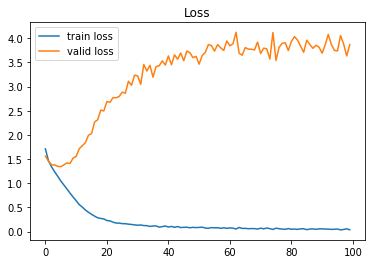

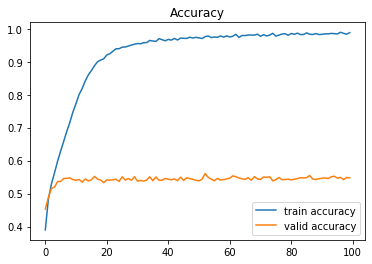

In [15]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()